In [340]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [341]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [342]:
print("Data has {} columns and {} rows".format(df.shape[1],df.shape[0]))

Data has 26 columns and 205 rows


**Check for Nulls**

In [343]:
df.isnull().sum()[df.isnull().sum()>0]
# Data has no nulls.

Series([], dtype: int64)

**Columns with only one values**

In [344]:
[col for col in df.columns if df[col].nunique()==1]
#None such columns

[]

CarName not supported
fueltype not supported
aspiration not supported
doornumber not supported
carbody not supported
drivewheel not supported
enginelocation not supported
enginetype not supported
cylindernumber not supported
fuelsystem not supported


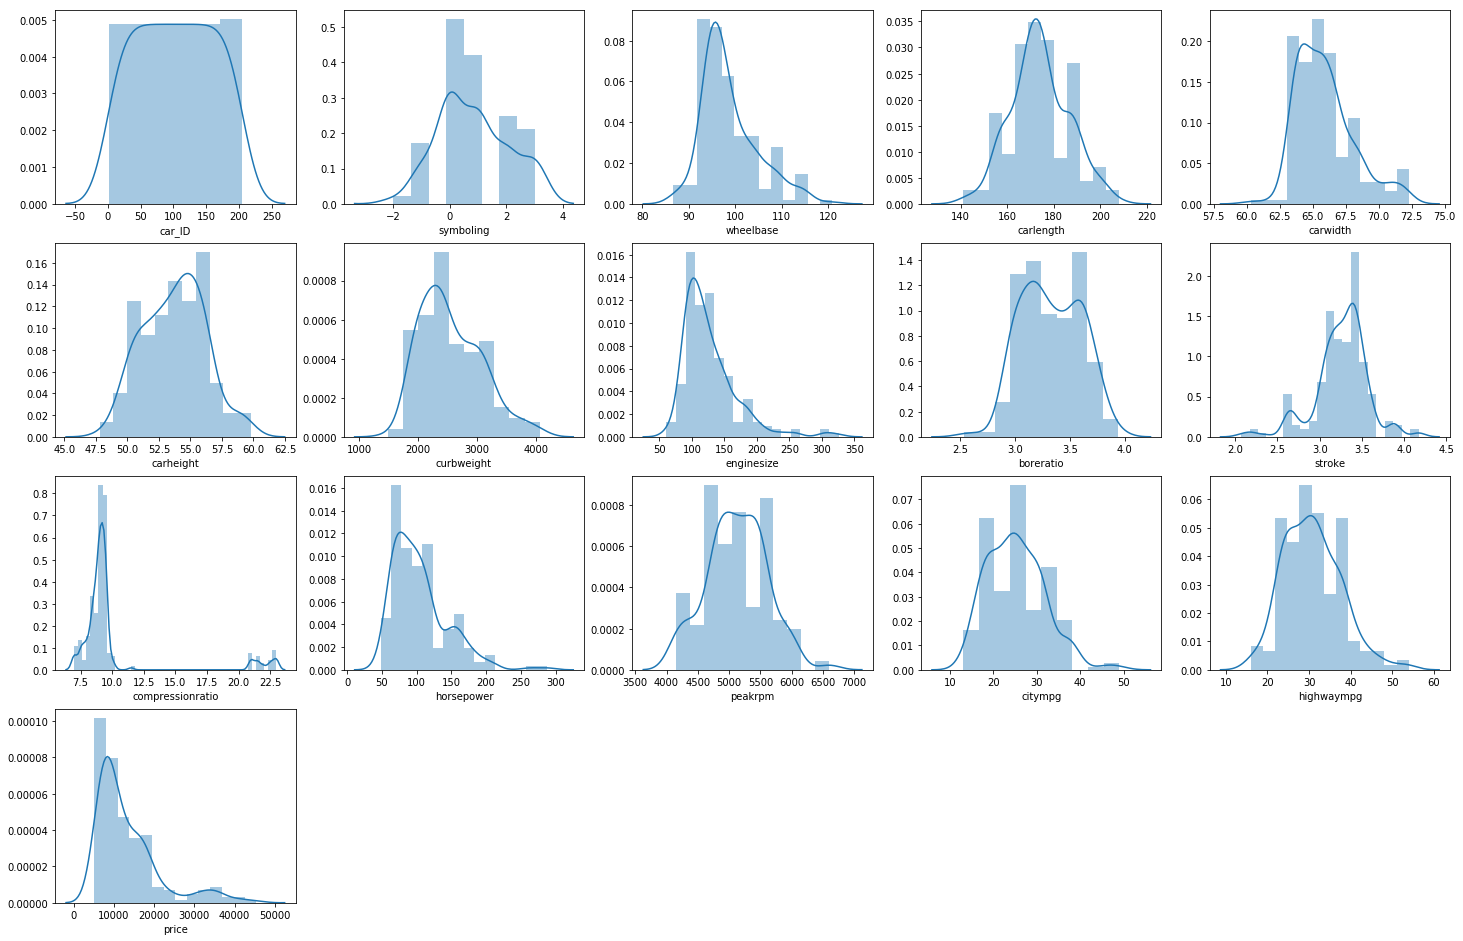

In [345]:
fig = plt.figure(figsize=(25,25))
num=1
for col in df.columns:
    try:    
        ax = fig.add_subplot(6,5,num)
        sns.distplot(df[col])
        num = num+1
    except:
        print(col,'not supported')
plt.show()

CarName not supported
fueltype not supported
aspiration not supported
doornumber not supported
carbody not supported
drivewheel not supported
enginelocation not supported
enginetype not supported
cylindernumber not supported
fuelsystem not supported


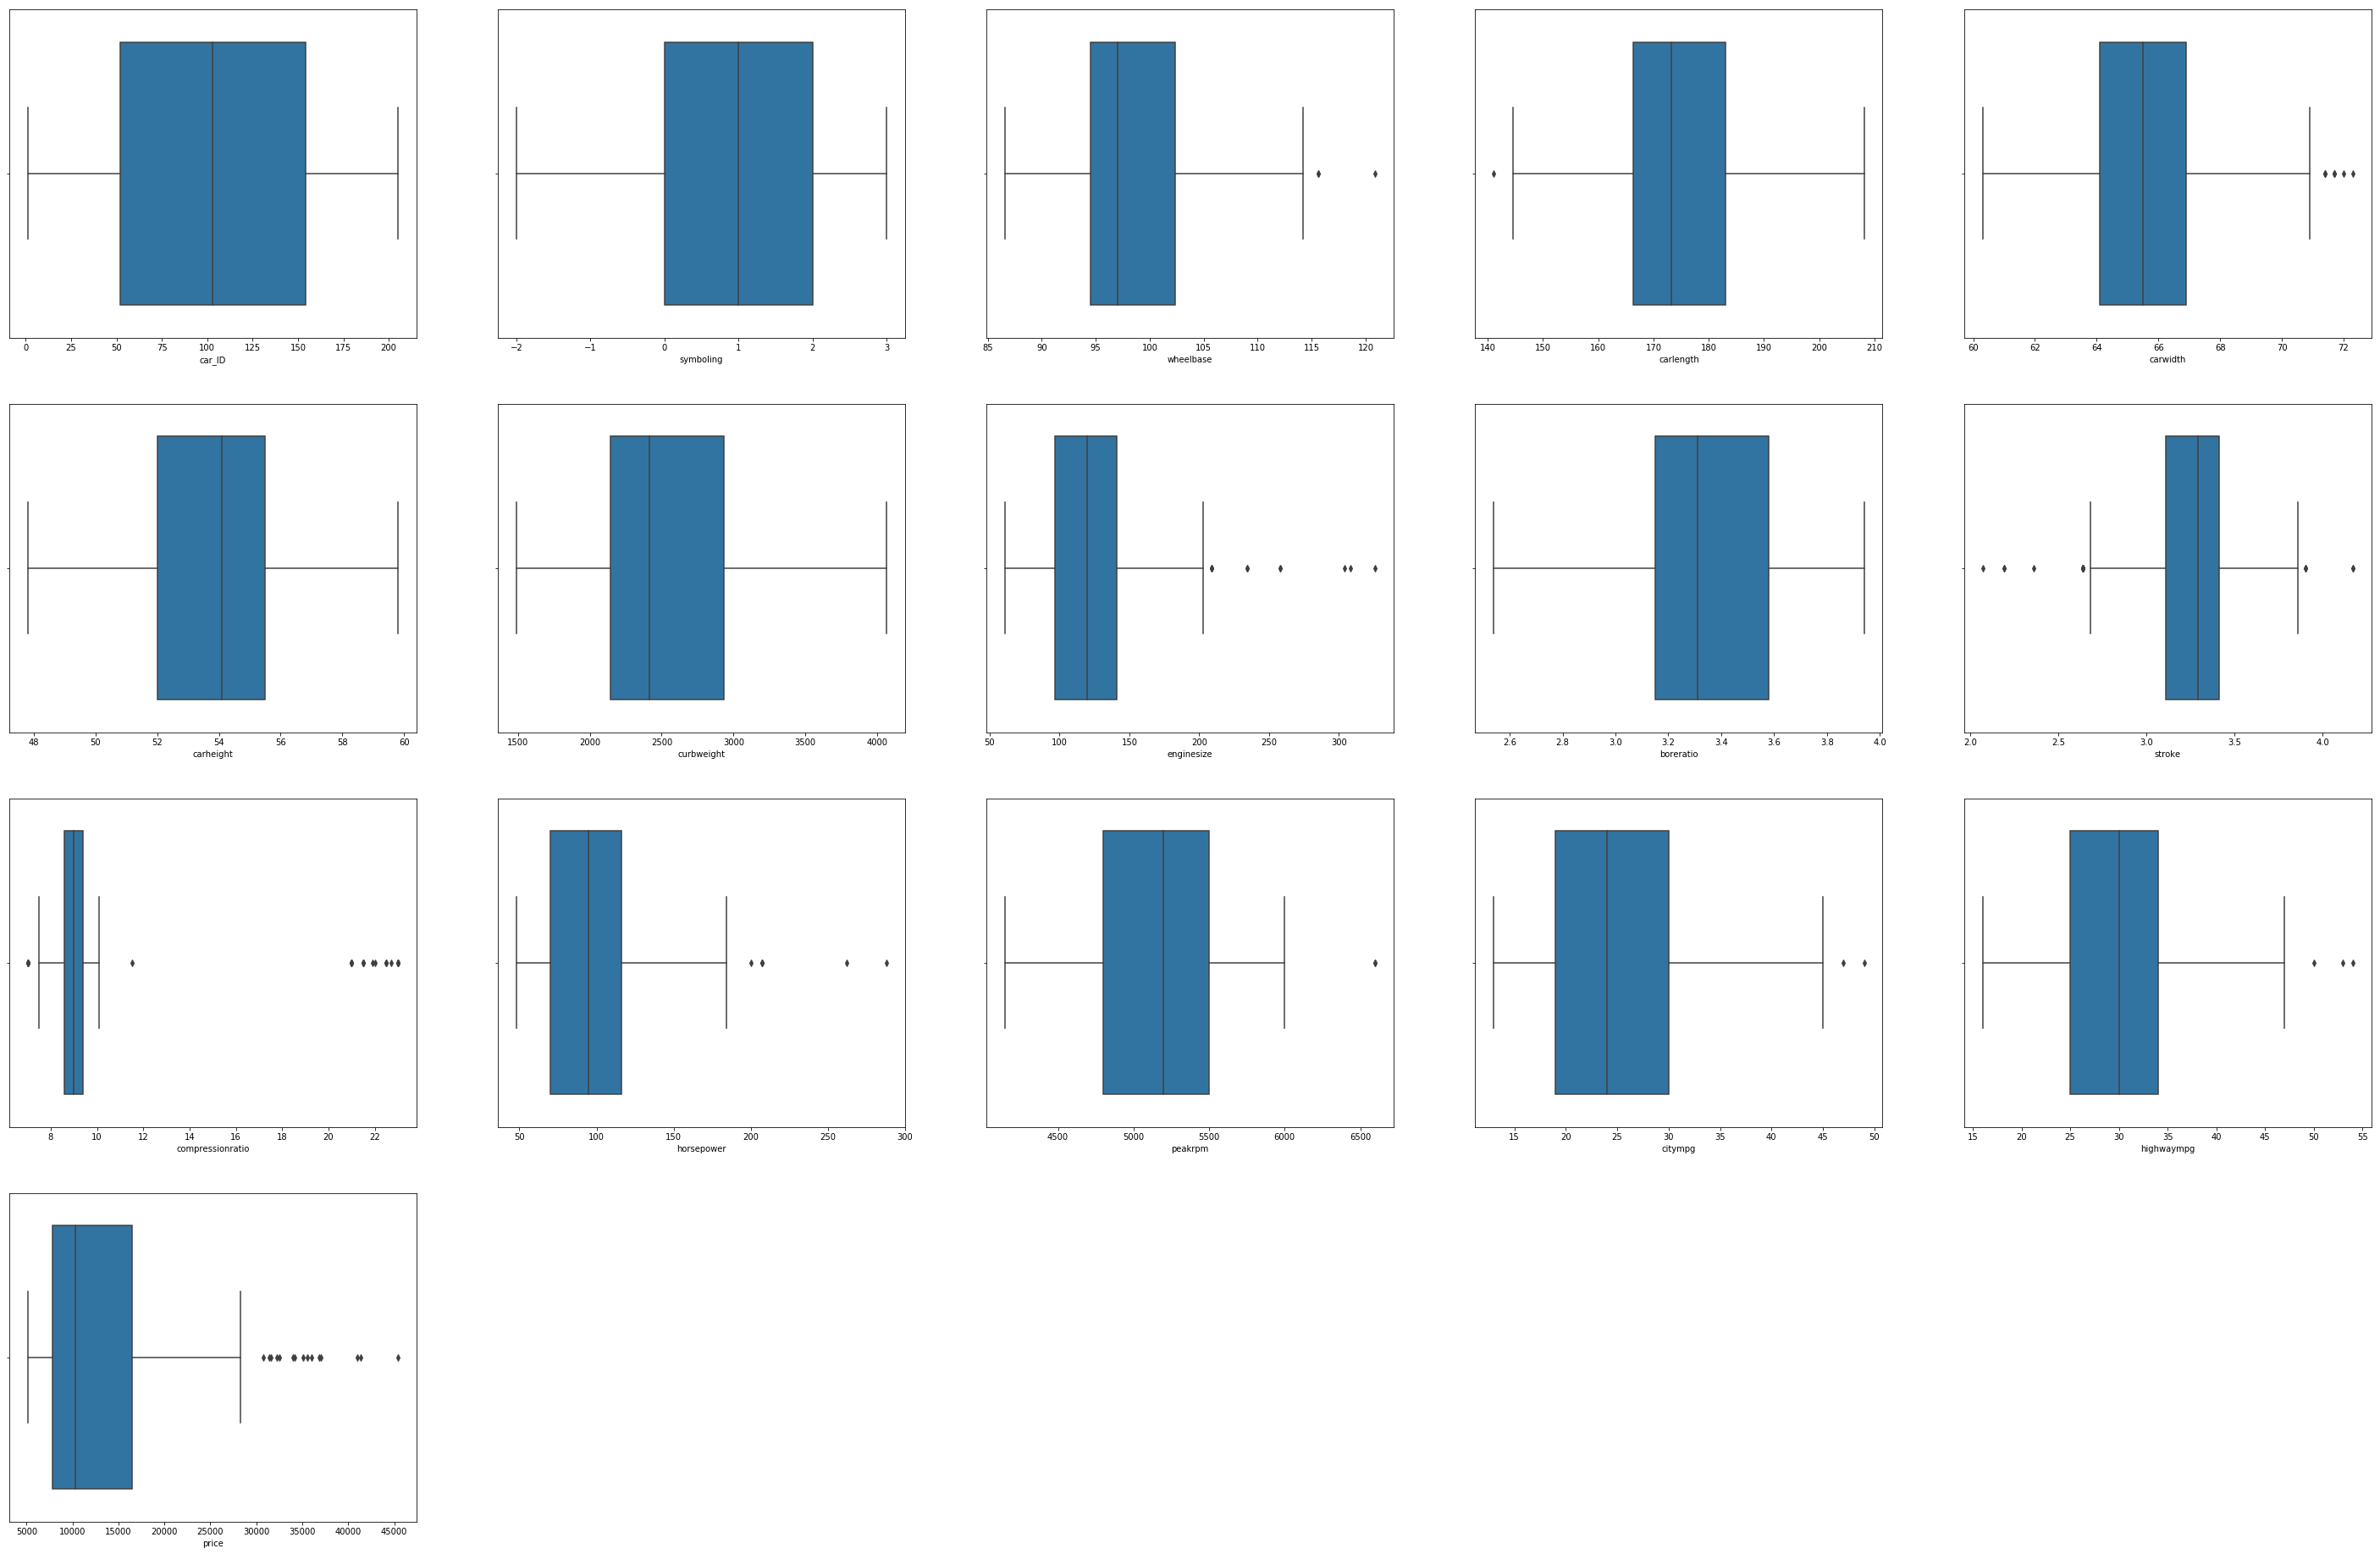

In [346]:
fig = plt.figure(figsize=(50,50))
num=1
for col in df.columns:
    try:    
        ax = fig.add_subplot(6,5,num)
        sns.boxplot(df[col])
        num = num+1
    except:
        print(col,'not supported')
plt.show()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

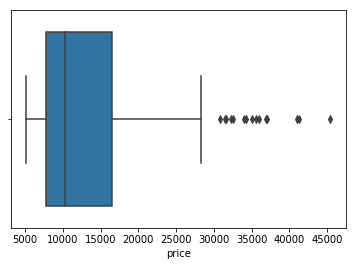

In [347]:
sns.boxplot(df['price']);df['price'].describe()
# Certainly some outliers here as the sale of more expensive cars are less , but will have to ask Buisness if we can remove these values.

In [348]:
#Lets put a cap on price over 90th percentile.

In [353]:
np.quantile(df['price'],0.90)

22563.0

In [357]:
df['price'] = np.where(df['price']>22563.0,22563.0,df['price'])

## Data Cleaning

**As mentioned in the problem statement.**
CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. We need to consider only company name as the independent variable for model building.

In [358]:
df.CarName = df['CarName'].apply(lambda x : x.lower().split(' ')[0])
# We can see spelling mistakes. Lets try to fix it.

In [359]:
df.CarName.value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
vw              2
maxda           2
toyouta         1
vokswagen       1
porcshce        1
mercury         1
Name: CarName, dtype: int64

In [360]:
#Fixing some spelling mistakes
df.CarName = df.CarName.str.replace('vw','volkswagen')
df.CarName = df.CarName.str.replace('toyouta','toyota')
df.CarName = df.CarName.str.replace('porcshce','porsche')
df.CarName = df.CarName.str.replace('vokswagen','volkswagen')
df.CarName = df.CarName.str.replace('maxda','mazda')


In [361]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [362]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [363]:
df['CarMake'] = df.CarName.values
df.drop('CarName',axis=1,inplace=True)

carmake = pd.get_dummies(df.CarMake,prefix='carmake').drop('carmake_volvo',axis=1)
#Dropping volvo as its unnecessary 

#Adding it to our main dataframe
df = pd.concat([df,carmake],axis=1)
df.drop('CarMake',axis=1,inplace=True)

carmake.head()

,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_honda,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [364]:
df['isgas'] = np.where(df['fueltype']=='gas',1,0)

df.drop('fueltype',axis=1,inplace=True)
#if gas = 0 , that means its diesel

In [365]:
print(df.aspiration.value_counts())

df['aspiration_isstd'] =  np.where(df['aspiration']=='std',1,0)
df.drop('aspiration',axis=1,inplace=True)
# If aspiration = 1 , its std and turbo if 0

std      168
turbo     37
Name: aspiration, dtype: int64


In [366]:
print(df.doornumber.value_counts())
# This can be both categorical/numerical. Lets take it as categorical as it can only be two and 4.
df['doornumber_isfour'] = np.where(df['doornumber']=='four',1,0)
df.drop('doornumber',axis=1,inplace=True)
# 1 indicates its four , 0 means two doornumber

four    115
two      90
Name: doornumber, dtype: int64


In [367]:
carbody = pd.get_dummies(df.carbody,prefix='carbody').drop('carbody_convertible',axis=1)
#Dropping convertible as its unnecessary 
print(carbody.head())
#Adding it to our main dataframe
df = pd.concat([df,carbody],axis=1)
df.drop('carbody',axis=1,inplace=True)

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon
0                0                  0              0              0
1                0                  0              0              0
2                0                  1              0              0
3                0                  0              1              0
4                0                  0              1              0


In [368]:
print(df.drivewheel.value_counts())
# Correcting 4wd
df.drivewheel = df.drivewheel.str.replace('4','r').value_counts()
df['drivewheel_isfwd'] = np.where(df['drivewheel']=='fwd',1,0)
# 1 indicates its fwd , 0 means two rwd

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [369]:
df['enginelocation_front'] = np.where(df['enginelocation']=='front',1,0)
#1 indicates its front , 0 means back
df.drop(['drivewheel','enginelocation'],axis=1,inplace=True)

In [370]:
print(df.cylindernumber.value_counts())

df.cylindernumber = df.cylindernumber.str.replace('four','4')
df.cylindernumber = df.cylindernumber.str.replace('two','2')
df.cylindernumber = df.cylindernumber.str.replace('six','6')
df.cylindernumber = df.cylindernumber.str.replace('five','5')
df.cylindernumber = df.cylindernumber.str.replace('eight','8')
df.cylindernumber = df.cylindernumber.str.replace('two','2')
df.cylindernumber = df.cylindernumber.str.replace('twelve','12')
df.cylindernumber = df.cylindernumber.str.replace('three','3')

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [371]:
enginetype = pd.get_dummies(df.enginetype,prefix='enginetype').drop(['enginetype_dohcv','enginetype_rotor'],axis=1)
#Dropping dohcv and rotor as the fequency is very low.

#Adding it to our main dataframe
df = pd.concat([df,enginetype],axis=1)
df.drop('enginetype',axis=1,inplace=True)
(enginetype.head())

,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [372]:
print(df.fuelsystem.value_counts())

fuelsystem = pd.get_dummies(df.fuelsystem,prefix='fuelsystem').drop(['fuelsystem_mfi','fuelsystem_spfi','fuelsystem_4bbl'],axis=1)
#Dropping 3 fuelsystems as the fequency is very low.

#Adding it to our main dataframe
df = pd.concat([df,fuelsystem],axis=1)
df.drop('fuelsystem',axis=1,inplace=True)
(enginetype.head())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [373]:
df['peakrpm_1kunit'] = df.peakrpm/1000
df.drop('peakrpm',inplace=True,axis=1)

In [1]:
df.head()

NameError: name 'df' is not defined

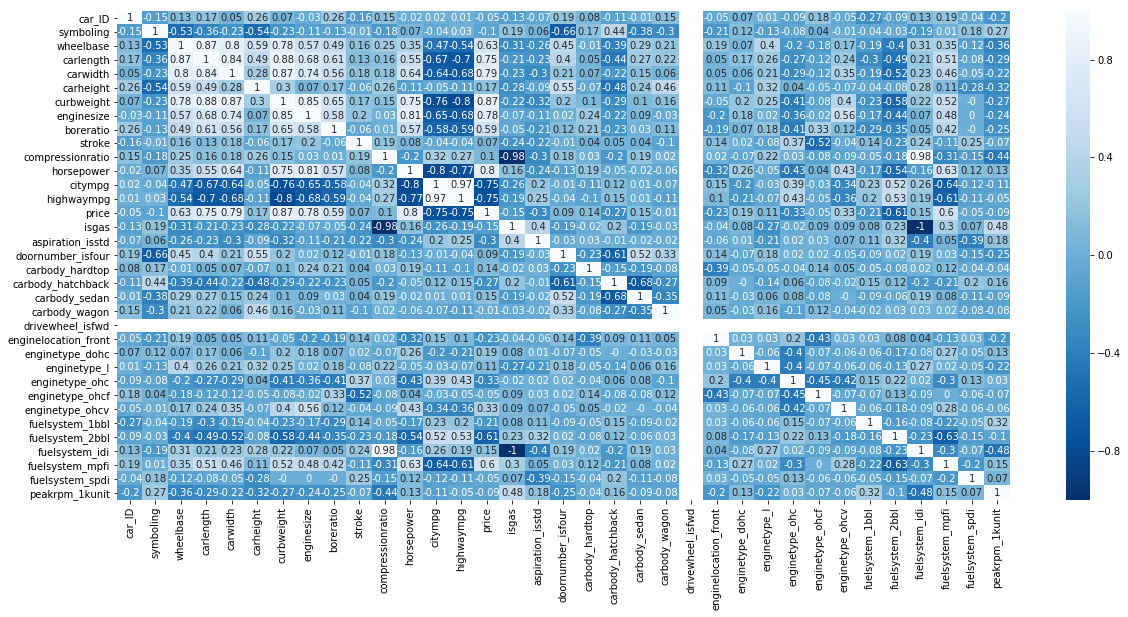

In [375]:
corr = df[df.columns[~df.columns.str.contains('carmake')]].corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='Blues_r')
plt.show()

<font color = 'green'>
**carwidth , curbweight, horsepower and enginesize has a very high correlation with price which makes sense as more powerful cars will pe expensive , similarly with bigger cars.
Price also affects the mpg as more powerful engines will use more fuel.**

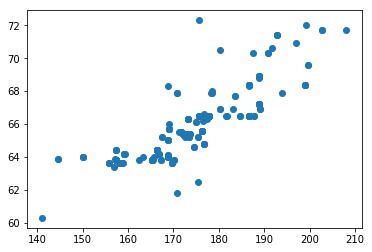

In [376]:
plt.scatter(df.carlength,df.carwidth)
# There is a very high correlation between carlength and carwidth. Lets merge these columns into Area

df['Area'] = df.carlength * df.carwidth
df.drop(['carlength','carwidth'],axis=1,inplace=True)

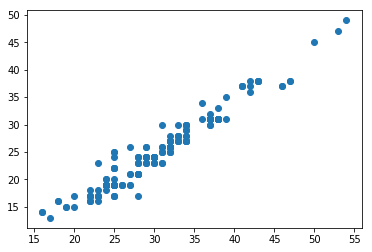

In [377]:
plt.scatter(df.highwaympg,df.citympg)
# There is a very high correlation between highwaympg and citympg. Lets merge these columns by taking average

df['mpg'] = (df.highwaympg + df.citympg)/2
df.drop(['highwaympg','citympg'],axis=1,inplace=True);

# Modelling with a linear model

In [378]:
#Creating functions
def stats_linear(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    

def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['vif_values'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "vif_values", ascending = False)
    return(vif)

In [379]:
# X is featureset and y is target variable
X = df.drop(['car_ID','price'],axis=1)
X = X.astype(float)
y = df.price

In [380]:
# First Model
stats_linear(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     59.27
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.17e-79
Time:                        05:52:26   Log-Likelihood:                -1743.4
No. Observations:                 205   AIC:                             3589.
Df Residuals:                     154   BIC:                             3758.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7661.1039 

,const,symboling,wheelbase,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_honda,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,isgas,aspiration_isstd,doornumber_isfour,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_isfwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,peakrpm_1kunit,Area,mpg
0,1.0,3.0,88.6,48.8,2548.0,4.0,130.0,3.47,2.68,9.00,111.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.00,10820.08,24.0
1,1.0,3.0,88.6,48.8,2548.0,4.0,130.0,3.47,2.68,9.00,111.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.00,10820.08,24.0
2,1.0,1.0,94.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.00,154.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.00,11213.60,22.5
3,1.0,2.0,99.8,54.3,2337.0,4.0,109.0,3.19,3.40,10.00,102.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,11690.92,27.0
4,1.0,2.0,99.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.00,115.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,11726.24,20.0
5,1.0,2.0,99.8,53.1,2507.0,5.0,136.0,3.19,3.40,8.50,110.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,11754.99,22.0
6,1.0,1.0,105.8,55.7,2844.0,5.0,136.0,3.19,3.40,8.50,110.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,13758.78,22.0
7,1.0,1.0,105.8,55.7,2954.0,5.0,136.0,3.19,3.40,8.50,110.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,13758.78,22.0
8,1.0,1.0,105.8,55.9,3086.0,5.0,131.0,3.13,3.40,8.30,140.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,13758.78,18.5
9,1.0,0.0,99.5,52.0,3053.0,5.0,131.0,3.13,3.40,7.00,160.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.50,12099.78,19.0


**Althout R-square looks very good the other statistics does not.**

##### Splitting the data into train and validation test

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

**Benchmark**

In [382]:
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     51.89
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.24e-59
Time:                        05:52:32   Log-Likelihood:                -1382.2
No. Observations:                 164   AIC:                             2864.
Df Residuals:                     114   BIC:                             3019.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7360.5511 

,const,symboling,wheelbase,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_honda,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,isgas,aspiration_isstd,doornumber_isfour,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_isfwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,peakrpm_1kunit,Area,mpg
66,1.0,0.0,104.9,54.4,2700.0,4.0,134.0,3.43,3.640,22.00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.20,11567.50,35.0
111,1.0,0.0,107.9,56.7,3075.0,4.0,120.0,3.46,2.190,8.40,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.00,12770.28,21.5
153,1.0,0.0,95.7,59.1,2280.0,4.0,92.0,3.05,3.030,9.00,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.80,10792.92,34.0
96,1.0,1.0,94.5,54.5,1971.0,4.0,97.0,3.15,3.290,9.40,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.20,10546.14,34.0
38,1.0,0.0,96.5,53.3,2289.0,4.0,110.0,3.15,3.580,9.00,86.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.80,10921.00,30.0
24,1.0,1.0,93.7,50.6,1967.0,4.0,90.0,2.97,3.230,9.40,68.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.50,10035.74,34.5
139,1.0,2.0,93.7,53.7,2120.0,4.0,108.0,3.62,2.640,8.70,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.40,10042.44,28.5
112,1.0,0.0,107.9,56.7,3252.0,4.0,152.0,3.70,3.520,21.00,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.15,12770.28,30.5
29,1.0,3.0,95.9,50.2,2811.0,4.0,156.0,3.60,3.900,7.00,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,11483.16,21.5
19,1.0,1.0,94.5,52.0,1874.0,4.0,90.0,3.03,3.110,9.60,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.40,9915.24,40.5


**Althout R-square looks very good. We see some variables with high p value. Lets remove these insignificant variables. Also we can see that there are strong multicollinearity problems. So we need to remove variables with high VIF**

## Scaling the values of features except for the dummy ones

In [383]:
st = StandardScaler()

In [384]:
num_cols = X_train.max()[X_train.max()>1].index

In [385]:
X_train[num_cols] = st.fit_transform(X_train[num_cols])

<font color='Red'> **Lets delect columns with HIGH VIF**

In [386]:
VIF(X_train).head()

,Features,vif_values
47,fuelsystem_idi,inf
28,carmake_subaru,inf
43,enginetype_ohcf,inf
23,carmake_peugeot,inf
31,isgas,inf


In [387]:
X_train.drop('fuelsystem_idi',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
41,enginetype_l,inf
23,carmake_peugeot,inf
39,enginelocation_front,2106.871834
31,isgas,169.213246
8,compressionratio,149.458186


In [388]:
X_train.drop('enginetype_l',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
39,enginelocation_front,2106.871834
31,isgas,169.213246
8,compressionratio,149.458186
28,carmake_subaru,145.483066
42,enginetype_ohcf,133.159816


In [389]:
X_train.drop('enginelocation_front',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
31,isgas,300.445678
40,enginetype_ohc,104.585206
5,enginesize,63.635677
45,fuelsystem_mpfi,43.850482
36,carbody_sedan,36.457766


In [390]:
X_train.drop('isgas',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
39,enginetype_ohc,69.855757
5,enginesize,54.458361
44,fuelsystem_mpfi,40.824553
35,carbody_sedan,31.142940
3,curbweight,29.953052


In [391]:
X_train.drop('enginetype_ohc',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
5,enginesize,51.285267
3,curbweight,29.371398
46,Area,28.535193
35,carbody_sedan,23.306196
9,horsepower,22.701651


In [392]:
X_train.drop('enginesize',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
3,curbweight,28.436073
45,Area,27.412213
34,carbody_sedan,22.340359
8,horsepower,21.929173
1,wheelbase,21.514436


In [393]:
X_train.drop('curbweight',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
33,carbody_sedan,21.965238
44,Area,21.183144
1,wheelbase,21.165327
41,fuelsystem_mpfi,20.599034
7,horsepower,19.713746


In [394]:
X_train.drop('carbody_sedan',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
43,Area,21.167050
1,wheelbase,20.968887
7,horsepower,19.331279
29,aspiration_isstd,17.765933
40,fuelsystem_mpfi,16.183628


In [395]:
X_train.drop('Area',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
7,horsepower,18.692880
29,aspiration_isstd,17.762829
40,fuelsystem_mpfi,15.782696
39,fuelsystem_2bbl,13.799224
36,enginetype_ohcf,12.505864


In [396]:
X_train.drop('horsepower',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
39,fuelsystem_mpfi,15.133515
38,fuelsystem_2bbl,13.758504
28,aspiration_isstd,13.689585
35,enginetype_ohcf,12.501390
25,carmake_subaru,12.460599


In [397]:
X_train.drop('fuelsystem_mpfi',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
28,aspiration_isstd,13.124746
35,enginetype_ohcf,12.462275
25,carmake_subaru,12.395807
1,wheelbase,9.615751
13,carmake_honda,9.207927


In [398]:
X_train.drop('aspiration_isstd',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
34,enginetype_ohcf,12.454317
25,carmake_subaru,12.152476
1,wheelbase,9.221433
13,carmake_honda,7.872965
36,fuelsystem_1bbl,7.558601


In [399]:
X_train.drop('enginetype_ohcf',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
1,wheelbase,8.860527
13,carmake_honda,7.870282
35,fuelsystem_1bbl,7.558245
36,fuelsystem_2bbl,7.249877
28,doornumber_isfour,7.206345


In [400]:
X_train.drop('wheelbase',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
12,carmake_honda,7.840057
34,fuelsystem_1bbl,7.449270
27,doornumber_isfour,7.117424
35,fuelsystem_2bbl,7.021385
38,mpg,5.953834


In [401]:
X_train.drop('carmake_honda',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
26,doornumber_isfour,7.018377
34,fuelsystem_2bbl,6.469508
37,mpg,5.897260
2,cylindernumber,5.820837
32,enginetype_ohcv,5.395785


In [402]:
X_train.drop('doornumber_isfour',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
33,fuelsystem_2bbl,6.223935
36,mpg,5.631947
2,cylindernumber,5.571346
31,enginetype_ohcv,5.330286
1,carheight,4.845306


In [403]:
X_train.drop('fuelsystem_2bbl',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
2,cylindernumber,5.482237
31,enginetype_ohcv,5.077759
1,carheight,4.705878
35,mpg,4.586524
34,peakrpm_1kunit,3.733569


In [404]:
X_train.drop('cylindernumber',axis=1,inplace=True)
VIF(X_train).head()

,Features,vif_values
1,carheight,4.680132
34,mpg,4.534644
2,boreratio,3.179431
33,peakrpm_1kunit,3.159385
3,stroke,2.954486


In [405]:
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     35.26
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.96e-50
Time:                        05:52:47   Log-Likelihood:                -1449.2
No. Observations:                 164   AIC:                             2968.
Df Residuals:                     129   BIC:                             3077.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.581e+04    

,const,symboling,carheight,boreratio,stroke,compressionratio,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,-0.727380,0.276779,0.405836,1.215101,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,-0.727380,1.207269,0.517384,-3.360166,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-0.727380,2.178216,-1.007108,-0.709667,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,0.078636,0.317235,-0.635281,0.110726,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.727380,-0.168238,-0.635281,1.025779,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,0.078636,-1.260553,-1.304570,-0.078595,-0.179337,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,0.884652,-0.006414,1.112308,-1.940256,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,-0.727380,1.207269,1.409770,0.836458,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.690668,-1.422377,1.037943,2.035494,-0.803946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,0.078636,-0.694167,-1.081474,-0.457238,-0.127286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


** We have deleted a lot of variables with no loss in R-squared. But there is still a lot of insignificant variables judging from the P values. Lets start removing these variables **

In [406]:
X_train.drop('symboling',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     36.50
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.75e-51
Time:                        05:52:48   Log-Likelihood:                -1449.5
No. Observations:                 164   AIC:                             2967.
Df Residuals:                     130   BIC:                             3072.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.599e+04    

,const,carheight,boreratio,stroke,compressionratio,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,0.276779,0.405836,1.215101,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,1.207269,0.517384,-3.360166,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,2.178216,-1.007108,-0.709667,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,0.317235,-0.635281,0.110726,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.168238,-0.635281,1.025779,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,-1.260553,-1.304570,-0.078595,-0.179337,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,-0.006414,1.112308,-1.940256,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.207269,1.409770,0.836458,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,-1.422377,1.037943,2.035494,-0.803946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-0.694167,-1.081474,-0.457238,-0.127286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [407]:
X_train.drop('carheight',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     37.40
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.06e-51
Time:                        05:52:50   Log-Likelihood:                -1450.5
No. Observations:                 164   AIC:                             2967.
Df Residuals:                     131   BIC:                             3069.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.574e+04    

,const,boreratio,stroke,compressionratio,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,0.405836,1.215101,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-3.360166,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.709667,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,0.110726,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,1.025779,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,-1.304570,-0.078595,-0.179337,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-1.940256,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,0.836458,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,2.035494,-0.803946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.457238,-0.127286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [408]:
X_train.drop('stroke',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     38.87
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.42e-52
Time:                        05:52:54   Log-Likelihood:                -1450.5
No. Observations:                 164   AIC:                             2965.
Df Residuals:                     132   BIC:                             3064.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.576e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_audi,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [409]:
X_train.drop('carmake_audi',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     40.35
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.38e-53
Time:                        05:52:54   Log-Likelihood:                -1450.8
No. Observations:                 164   AIC:                             2964.
Df Residuals:                     133   BIC:                             3060.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.599e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mercury,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [410]:
X_train.drop('carmake_mercury',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     41.55
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.97e-53
Time:                        05:52:55   Log-Likelihood:                -1451.7
No. Observations:                 164   AIC:                             2963.
Df Residuals:                     134   BIC:                             3056.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.585e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,fuelsystem_spdi,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [411]:
X_train.drop('fuelsystem_spdi',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     43.31
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.17e-54
Time:                        05:52:55   Log-Likelihood:                -1451.7
No. Observations:                 164   AIC:                             2961.
Df Residuals:                     135   BIC:                             3051.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.584e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,drivewheel_isfwd,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [412]:
X_train.drop('drivewheel_isfwd',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     43.31
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.17e-54
Time:                        05:52:56   Log-Likelihood:                -1451.7
No. Observations:                 164   AIC:                             2961.
Df Residuals:                     135   BIC:                             3051.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.584e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_hatchback,carbody_wagon,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [413]:
X_train.drop('carbody_hatchback',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.94e-55
Time:                        05:52:57   Log-Likelihood:                -1451.8
No. Observations:                 164   AIC:                             2960.
Df Residuals:                     136   BIC:                             3046.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.582e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,carbody_wagon,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [414]:
X_train.drop('carbody_wagon',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     46.91
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.15e-55
Time:                        05:52:58   Log-Likelihood:                -1452.4
No. Observations:                 164   AIC:                             2959.
Df Residuals:                     137   BIC:                             3043.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.576e+04    

,const,boreratio,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,peakrpm_1kunit,mpg
66,1.0,0.405836,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,0.517384,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-1.007108,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.635281,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.635281,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.332015,0.349670
24,1.0,-1.304570,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,1.112308,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,1.409770,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,1.037943,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-1.081474,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


In [415]:
X_train.drop('boreratio',axis=1,inplace=True)
stats_linear(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     48.17
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.42e-56
Time:                        05:53:00   Log-Likelihood:                -1453.9
No. Observations:                 164   AIC:                             2960.
Df Residuals:                     138   BIC:                             3040.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.582e+04    

,const,compressionratio,carmake_alfa-romero,carmake_bmw,carmake_buick,carmake_chevrolet,carmake_dodge,carmake_isuzu,carmake_jaguar,carmake_mazda,carmake_mitsubishi,carmake_nissan,carmake_peugeot,carmake_plymouth,carmake_porsche,carmake_renault,carmake_saab,carmake_subaru,carmake_toyota,carmake_volkswagen,carbody_hardtop,enginetype_dohc,enginetype_ohcv,fuelsystem_1bbl,peakrpm_1kunit,mpg
66,1.0,3.099860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.917829,1.152835
111,1.0,-0.439591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
153,1.0,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.699137,0.992202
96,1.0,-0.179337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113323,0.992202
38,1.0,-0.283439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.332015,0.349670
24,1.0,-0.179337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722669,1.072518
139,1.0,-0.361515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.511598,0.108721
112,1.0,2.839607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.019386,0.429987
29,1.0,-0.803946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292907,-1.015709
19,1.0,-0.127286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519554,2.036315


** Looks like we have only significant columns left and we have solved multicollinearity **

In [416]:
## Putting transformations on train set to test set
cols_touse = X_train.columns
X_test[num_cols] = st.transform(X_test[num_cols])
X_test = X_test[cols_touse]

In [417]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [418]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8544177643535227

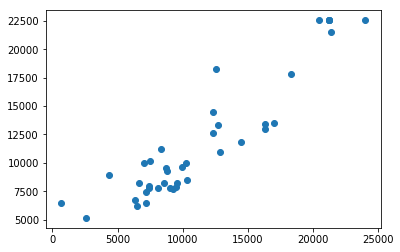

In [419]:
plt.scatter(y_pred,y_test)

** ~0.85 is a good R2 so lets have this as our final model. Compared to our R2 in training set which was ~0.89, we have a robust model thats not overfitting.**

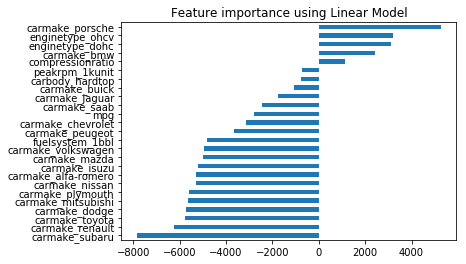

In [420]:
coef = pd.Series(model.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Model");